# Python Project - Prosper Loan Data Analysis
## by Salaudeen Khaleeed

## Introduction
> The dataset used for this project is the Prosper Loan Dataset. The dataset contains data about the details of the various loans lent to the borrowers from Prosper. Each row in the dataset represents a loan, uniquely identified by the Listing Key.
Every row in the dataset describes various attributes about the Borrower such as Employment Status, Credit Score, etc. Every row also describes other parameters such as Monthly Payments, On Time Payments, Interest Rate, etc.

## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
df_full = pd.read_csv('Prosper Loan.csv')

In [3]:
# Examining Dataset Head
df_full.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Number of rows and columns of dataset
df_full.shape

(113937, 81)

In [5]:
# A concise summary of the dataframe,including the number of non-null values in each colum
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

- Using 81 variables for the analysis is not realistic, we will select around 15 of the most interesting one with the use of the data dictionary in selection of the relevant variables.

### Dealing with Duplicates

In [6]:
# checking for duplicates
sum(df_full.duplicated())

0

- At first glance it seems there are no duplicates in the dataset but further check would be needed to be done using the ID.
- There seems to be multiple loan identifies.

In [7]:
df_full.ListingKey.nunique()

113048

In [8]:
df_full.ListingNumber.nunique()

113066

In [9]:
df_full.LoanKey.nunique()

113044

- We can select any of the IDs as the index for our dataset, as they all appear to represent the loan ID. 
- However, there is a slightly lower number of unique keys compared to the total number of data points, indicating that there are some duplicates.
- Let's first address these duplicates and clean the data.

In [10]:
df_full[df_full.ListingNumber.duplicated() == True].count()['LoanKey']

871

In [11]:
df_full[df_full.ListingNumber.duplicated() == True]['LoanKey'].head()

9       02163700809231365A56A1C
999     CB643706582969191E8C26B
2539    DC303708663304668E74587
4942    8D84369399064302947D8B5
5812    129C369881799628360C904
Name: LoanKey, dtype: object

- on several occasions in the ProsperScore where the valuse shoulden't be > 10 according to the dictionery we have 11 this prompted the dropping of the column in order to ascertain more clearance of duplicate values

In [12]:
# dropping the ProperScore column
df_full.drop('ProsperScore', axis=1, inplace=True)

In [13]:
# rechecking duplicates
df_full.duplicated().sum()

871

In [14]:
# drop duplicate rows
df_full.drop_duplicates(inplace=True)
df_full[df_full.ListingNumber.duplicated() == True].count()['ListingNumber']

0

In [15]:
df_full.ListingNumber.nunique()

113066

In [16]:
# all loans are now included only once
df_full.shape

(113066, 80)

### Selecting Variables and Simple Data Cleaning

Following columns are selected for further relevant analysis:

- ListingKey
- LoanOriginationDate
- ClosedDate
- ClosedDate
- LoanStatus
- Term
- LoanOriginalAmount 
- MonthlyLoanPayment
- ListingCategory (numeric)
- BorrowerAPR
- BorrowerRate
- CreditGrade
- ProsperRating (Alpha)
- CreditScoreRangeLower
- CreditScoreRangeUpper
- IncomeRange
- IncomeVerifiable
- StatedMonthlyIncome
- DebtToIncomeRatio
- EmploymentStatus
- IsBorrowerHomeowner
- Occupation

In [17]:
# this variable subset will be a starting point for further cleaning and investigation of relevant data
df = df_full[['ListingKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term', 'LoanOriginalAmount', 'MonthlyLoanPayment',\
              'ListingCategory (numeric)', 'BorrowerAPR', 'BorrowerRate', \
              'CreditGrade', 'ProsperRating (Alpha)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',\
              'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'EmploymentStatus',\
              'IsBorrowerHomeowner', 'Occupation']]

In [18]:
df.head()

,ListingKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory (numeric),BorrowerAPR,BorrowerRate,...,ProsperRating (Alpha),CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,Occupation
0,1021339766868145413AB3B,12/09/2007 00:00,14/08/2009 00:00,Completed,36,9425,330.43,0,0.16516,0.1580,...,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True,Other
1,10273602499503308B223C1,03/03/2014 00:00,NaN,Current,36,10000,318.93,2,0.12016,0.0920,...,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False,Professional
2,0EE9337825851032864889A,17/01/2007 00:00,17/12/2009 00:00,Completed,36,3001,123.32,0,0.28269,0.2750,...,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False,Other
3,0EF5356002482715299901A,01/11/2012 00:00,NaN,Current,36,10000,321.45,16,0.12528,0.0974,...,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True,Skilled Labor
4,0F023589499656230C5E3E2,20/09/2013 00:00,NaN,Current,36,15000,563.97,2,0.24614,0.2085,...,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True,Executive


In [19]:
# viewing changes in data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113066 non-null  object 
 1   LoanOriginationDate        113066 non-null  object 
 2   ClosedDate                 55076 non-null   object 
 3   LoanStatus                 113066 non-null  object 
 4   Term                       113066 non-null  int64  
 5   LoanOriginalAmount         113066 non-null  int64  
 6   MonthlyLoanPayment         113066 non-null  float64
 7   ListingCategory (numeric)  113066 non-null  int64  
 8   BorrowerAPR                113041 non-null  float64
 9   BorrowerRate               113066 non-null  float64
 10  CreditGrade                28953 non-null   object 
 11  ProsperRating (Alpha)      83982 non-null   object 
 12  CreditScoreRangeLower      112475 non-null  float64
 13  CreditScoreRangeUpper      112475 

In [20]:
# renaming columns with spaces
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [21]:
df.head()

,ListingKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,...,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,Occupation
0,1021339766868145413AB3B,12/09/2007 00:00,14/08/2009 00:00,Completed,36,9425,330.43,0,0.16516,0.1580,...,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True,Other
1,10273602499503308B223C1,03/03/2014 00:00,NaN,Current,36,10000,318.93,2,0.12016,0.0920,...,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False,Professional
2,0EE9337825851032864889A,17/01/2007 00:00,17/12/2009 00:00,Completed,36,3001,123.32,0,0.28269,0.2750,...,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False,Other
3,0EF5356002482715299901A,01/11/2012 00:00,NaN,Current,36,10000,321.45,16,0.12528,0.0974,...,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True,Skilled Labor
4,0F023589499656230C5E3E2,20/09/2013 00:00,NaN,Current,36,15000,563.97,2,0.24614,0.2085,...,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True,Executive


In [22]:
# date columns as dates
def parse_date(value):
    if isinstance(value, float):  # If the value is a float (e.g., Unix timestamp)
        # Convert float (Unix timestamp) to datetime
        return pd.to_datetime(value, unit='s')  # Assume seconds for Unix timestamp
    elif isinstance(value, str):  # If the value is a string, use dateutil.parser
        try:
            return parser.parse(value)
        except (ValueError, TypeError):
            return None  # Return None if parsing fails
    else:
        return None  # Return None if the value is not a string or float

In [23]:
df['LoanOriginationDate'] = df['LoanOriginationDate'].apply(parser.parse)

In [24]:
df['ClosedDate'] = df['ClosedDate'].apply(parse_date)

In [25]:
df.head()

,ListingKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,...,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,Occupation
0,1021339766868145413AB3B,2007-12-09,2009-08-14,Completed,36,9425,330.43,0,0.16516,0.1580,...,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True,Other
1,10273602499503308B223C1,2014-03-03,NaT,Current,36,10000,318.93,2,0.12016,0.0920,...,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False,Professional
2,0EE9337825851032864889A,2007-01-17,2009-12-17,Completed,36,3001,123.32,0,0.28269,0.2750,...,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False,Other
3,0EF5356002482715299901A,2012-01-11,NaT,Current,36,10000,321.45,16,0.12528,0.0974,...,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True,Skilled Labor
4,0F023589499656230C5E3E2,2013-09-20,NaT,Current,36,15000,563.97,2,0.24614,0.2085,...,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True,Executive


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ListingKey             113066 non-null  object        
 1   LoanOriginationDate    113066 non-null  datetime64[ns]
 2   ClosedDate             55067 non-null   datetime64[ns]
 3   LoanStatus             113066 non-null  object        
 4   Term                   113066 non-null  int64         
 5   LoanOriginalAmount     113066 non-null  int64         
 6   MonthlyLoanPayment     113066 non-null  float64       
 7   ListingCategory        113066 non-null  int64         
 8   BorrowerAPR            113041 non-null  float64       
 9   BorrowerRate           113066 non-null  float64       
 10  CreditGrade            28953 non-null   object        
 11  ProsperRating          83982 non-null   object        
 12  CreditScoreRangeLower  112475 non-null  float64  

In [27]:
# Checking the income range count
df.IncomeRange.value_counts()

IncomeRange
$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: count, dtype: int64

In [28]:
# reduce no. of IncomeRange categories by 1
df.IncomeRange.replace({'$0': 'Not employed'}, inplace=True)

In [29]:
# Defining Function To Replace Listing Category Number with String
def replace_cat_num(numeric):
    list_dict = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return list_dict[numeric]

# Adding Column to Dataframe for Category String
df['ListingCategory'] = df['ListingCategory'].apply(replace_cat_num)

In [30]:
# Defining CreditGrade, ProsperRating, IncomeRange as ordered categorical variables
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [31]:
df.head()

,ListingKey,LoanOriginationDate,ClosedDate,LoanStatus,Term,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory,BorrowerAPR,BorrowerRate,...,ProsperRating,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,EmploymentStatus,IsBorrowerHomeowner,Occupation
0,1021339766868145413AB3B,2007-12-09,2009-08-14,Completed,36,9425,330.43,Not Available,0.16516,0.1580,...,NaN,640.0,659.0,"$25,000-49,999",True,3083.333333,0.17,Self-employed,True,Other
1,10273602499503308B223C1,2014-03-03,NaT,Current,36,10000,318.93,Home Improvement,0.12016,0.0920,...,A,680.0,699.0,"$50,000-74,999",True,6125.000000,0.18,Employed,False,Professional
2,0EE9337825851032864889A,2007-01-17,2009-12-17,Completed,36,3001,123.32,Not Available,0.28269,0.2750,...,NaN,480.0,499.0,Not displayed,True,2083.333333,0.06,Not available,False,Other
3,0EF5356002482715299901A,2012-01-11,NaT,Current,36,10000,321.45,Motorcycle,0.12528,0.0974,...,A,800.0,819.0,"$25,000-49,999",True,2875.000000,0.15,Employed,True,Skilled Labor
4,0F023589499656230C5E3E2,2013-09-20,NaT,Current,36,15000,563.97,Home Improvement,0.24614,0.2085,...,D,680.0,699.0,"$100,000+",True,9583.333333,0.26,Employed,True,Executive


### What is the structure of your dataset?

> The dataset has 113937 indicies with 81 columns and a dataframe type. That is over 133k loans and 81 variables to be analysed.

### What is/are the main feature(s) of interest in your dataset?

> Borrower information: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.

> Loan performance information: Metrics evaluating the risk associated with the loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Supporting features in the dataset includes borrower details (e.g., ProsperRating, IncomeRange, DebtToIncomeRatio) and loan attributes (e.g., LoanOriginalAmount, LoanTerm, ListingCategory).

> Loan performance metrics like LoanStatus, PastDueAmount, and OnTimeProsperPayments track repayment behavior. This data supports analyzing borrower profiles, loan trends, and risk-return patterns.

## Univariate Exploration

> In this section distribution of  some variable would be explored

### What is the most common reason for taking a loan?

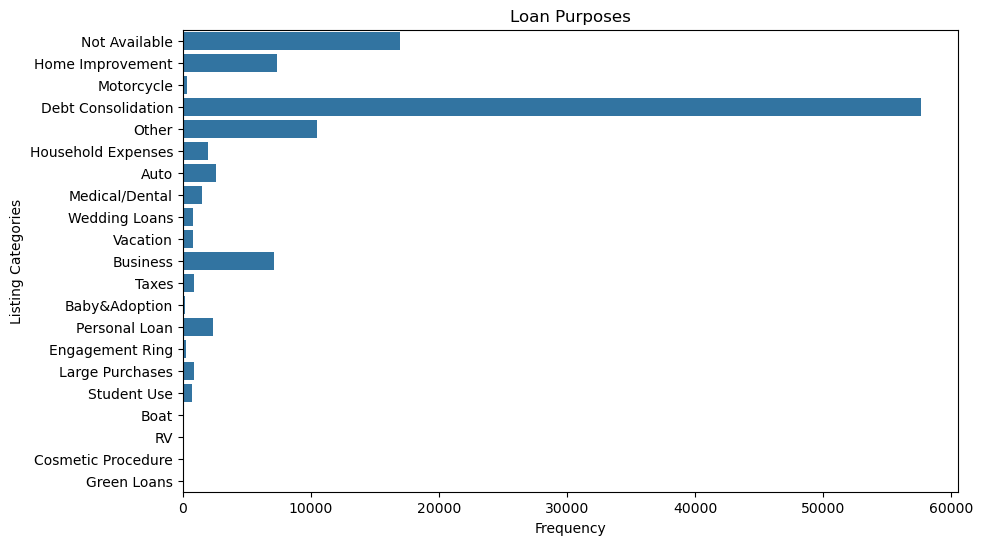

In [32]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='ListingCategory', data=df)
plt.title( "Loan Purposes")
plt.xlabel('Frequency')
plt.ylabel('Listing Categories')
plt.show()

- This shows that the common loan purposes include debt consolidation, home improvement, personal expenses, and business purposes, with debt consolidation being the most frequent. These purposes reflect borrowers seeking to manage existing debt, improve their homes, or fund personal or entrepreneurial goals.

### What is the employment status of borrowers?

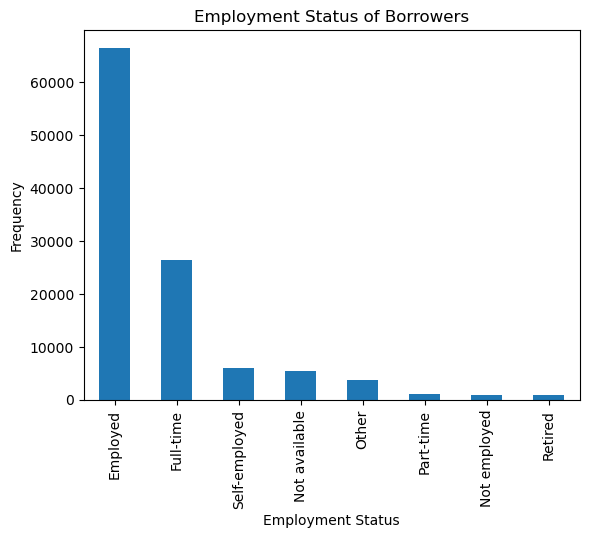

In [33]:
df['EmploymentStatus'].value_counts().plot.bar(title='Employment Status of Borrowers')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.show()

- In the Prosper dataset, most borrowers are **employed**, with a smaller portion being **self-employed** or **unemployed**. Borrowers with stable employment tend to have higher loan amounts, while those with unstable employment or no employment may show higher default rates or request smaller loans. the next visualization is to check what are their occupations

### What are the top occupations of borrowers

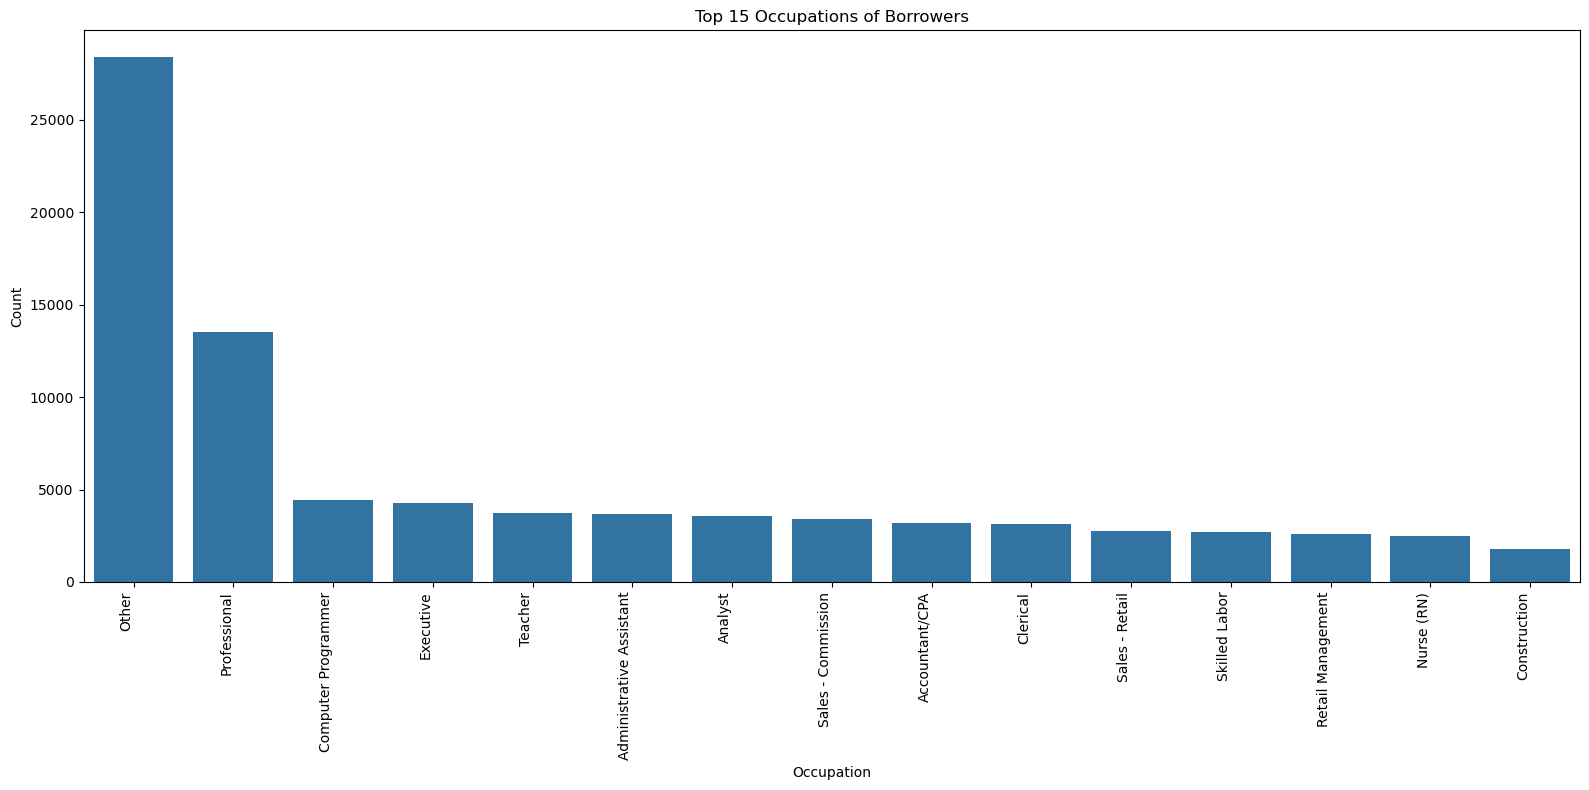

In [34]:
# Selecting the top 15 occupations
top_15_occupations = df['Occupation'].value_counts().nlargest(15).index
df_top_15 = df[df['Occupation'].isin(top_15_occupations)]

# Plot the vertical bar chart
plt.figure(figsize=(16, 8))
sns.countplot(x='Occupation', data=df_top_15, order=top_15_occupations)

# Customize the plot
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels
plt.title('Top 15 Occupations of Borrowers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()

# Show the plot
plt.show()

- Occupations are diverse, with many in professional roles (e.g., managers, engineers, IT professionals), followed by sales, education, and healthcare sectors. Occupation often correlates with income, with professionals typically requesting larger loan amounts, while borrowers in less stable occupations tend to seek smaller loans or have higher default rates.

### In what year is the highest number of loan originated?

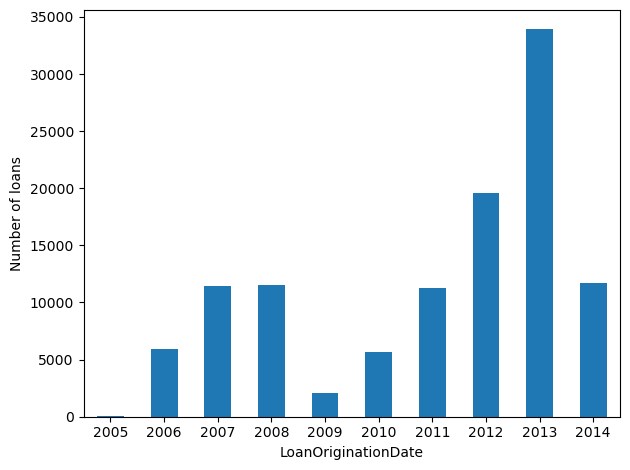

In [35]:
# Plottng bar chart
df.groupby(df.LoanOriginationDate.dt.year).count()['LoanOriginationDate'].plot(kind='bar')
plt.ylabel('Number of loans')
plt.xticks(rotation=0)
plt.tight_layout()

- The highest number of loans were originated in the year of **2013**, whereas the least number of loans originated in the year of **2005**.
Additionally, it can also be seen that a positively increasing trend can be observed in the number of loan originations starting from the year **2009** to **2013**, which peaked in **2013**, and then the increase was interrupted. It can also be seen that the number of loans almost doubled every year in comparison to the previous year, for the year **2010 - 2013**.

### What is the distribution of the loan original amount?

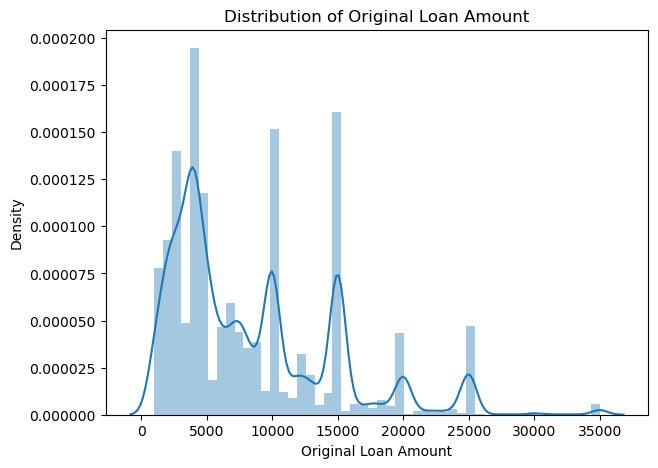

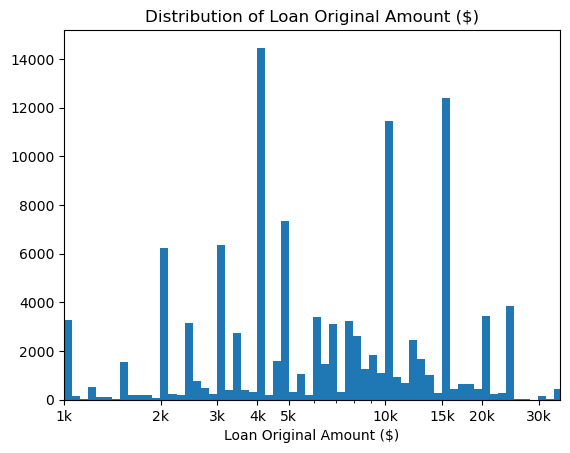

In [36]:
# plot bar line chart
fig = plt.figure(figsize=(7,5))
sns.distplot(df['LoanOriginalAmount'], bins=50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount')
plt.show()


# plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

- Most of the loans that were given, are between 2,000 - 10,000, with loans are of amount > 25,000 are extremely rarely given.
Additionally, loans of amount 10,000 and 15,000 also are very commonly issued.

- Loan amounts are right skewed with several peaks as shown in the histogram.
The most frequently loaned amount is 4000.

### What is the distribution of the monthly loan payments?

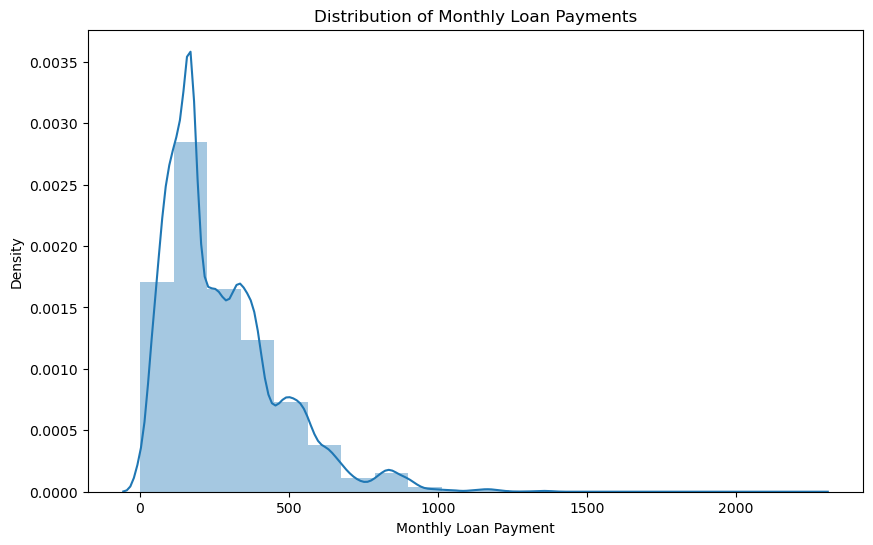

In [39]:
# plot bar line chart
fig = plt.figure(figsize=(10,6))
sns.distplot(df['MonthlyLoanPayment'], bins=20)
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment')
plt.show()

In [40]:
df.MonthlyLoanPayment.mode()

0    173.71
Name: MonthlyLoanPayment, dtype: float64

In [41]:
df.MonthlyLoanPayment.value_counts().nlargest(5)

MonthlyLoanPayment
173.71    2423
0.00       935
172.76     530
86.85      472
174.20     460
Name: count, dtype: int64

- Monthly payment distribution is right skewed and has a long tail.
Let's look at its log transformed distribution

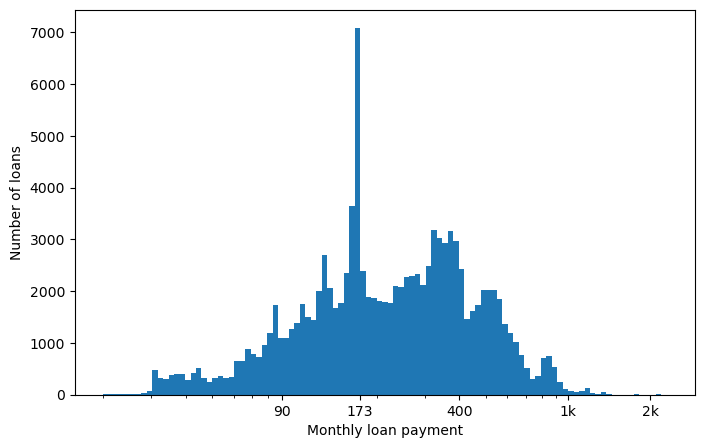

In [42]:
# Plot  histogram, to view more indeptly
log_binsize = 0.02
bins = 10 ** np.arange(1.3, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xlabel('Monthly loan payment')
plt.ylabel('Number of loans')
plt.xticks([90, 173, 400, 1e3, 2e3], [90, 173, 400, '1k', '2k'])
plt.show()

- Now we can see the distribution more clearly. Many loans have very low loan payments and the mode of 173 is clearly visible.

### What is the most common duration by which loans are taken?

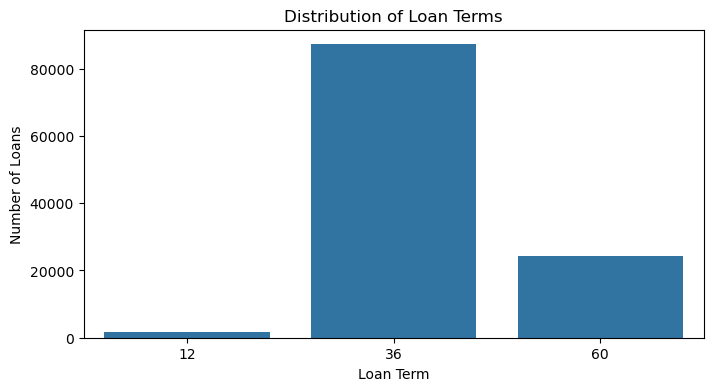

In [44]:
# plot bar chart 
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Term', data=df)
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans')
plt.show()

- **Most Common Duration**: **36 months** loans are the most popular, balancing manageable repayment periods and interest rates.  
- **Short-Term Loans**: **12 months** loans are preferred for smaller amounts or borrowers seeking quicker repayment.  
- **Long-Term Loans**: **60 months** loans are chosen for larger amounts, offering lower monthly payments but higher overall interest costs.  

These patterns reflect borrowers' financial needs and repayment capacities.

### What is the income range of borrowers?

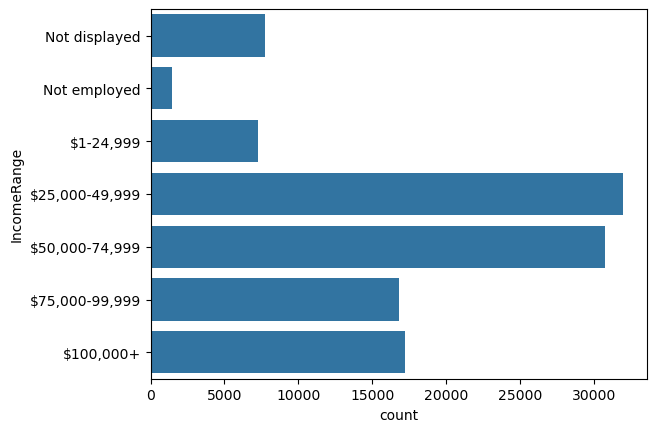

In [45]:
# plot horizontal bar chart
sns.countplot(data = df, y = 'IncomeRange')
plt.xticks(rotation = 0);

**Income distribution shows:**  

- Moderate Incomes Dominate: Most borrowers fall into the **25,000-49,999** and **50,000-74,999** income ranges.  
- High-Income Borrowers: Borrowers earning **100,000+** represent a smaller group but tend to take larger loans.  
- Low or No Income: Borrowers with incomes **below 25,000** or listed as **"Not employed"** often take smaller loans and might have higher interest rates due to perceived risk.  

This reflects diverse borrower profiles with varying financial capacities.

### Is Borrower home owner?

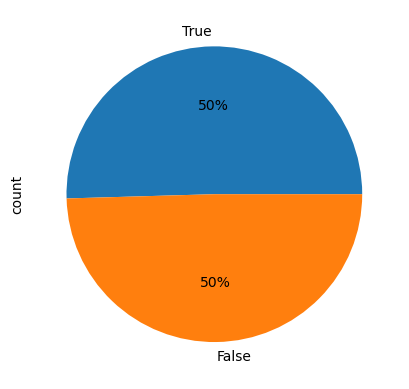

In [46]:
# plot pie chart
df.IsBorrowerHomeowner.value_counts().plot(kind='pie', autopct='%1.0f%%');

Exactly half of loans belongs to a borrower who is a home owner.

**The Prosper dataset shows:**  

- **Loan Amount**: Positively skewed with outliers; log transformation applied.  
- **Emplyment Status**: Uniform mid-range distribution; no transformations needed.  
- **Income Range**: Dominated by mid-range incomes; low-frequency categories grouped.  
- **Loan Term**: Multimodal (12, 36, 60 months); no transformations required.
- **Loan Purposes**: Most borrowers get loan for debt consolidation  

**Key patterns and necessary adjustments were identified for analysis.**

- I reduced the number of income ranges by one by merging USD 0 with Not Employed into the same category.
- I further looked at a couple of right skewed variables using a logarithmic scale to better see where the bulk of the data points lie.
- Most of my cleaning efforts and adjustment were on ordering factors levels to make more intuitive sense.

## Bivariate Exploration

### How does Borrower's Employment affect the Loan Interest Rate ?

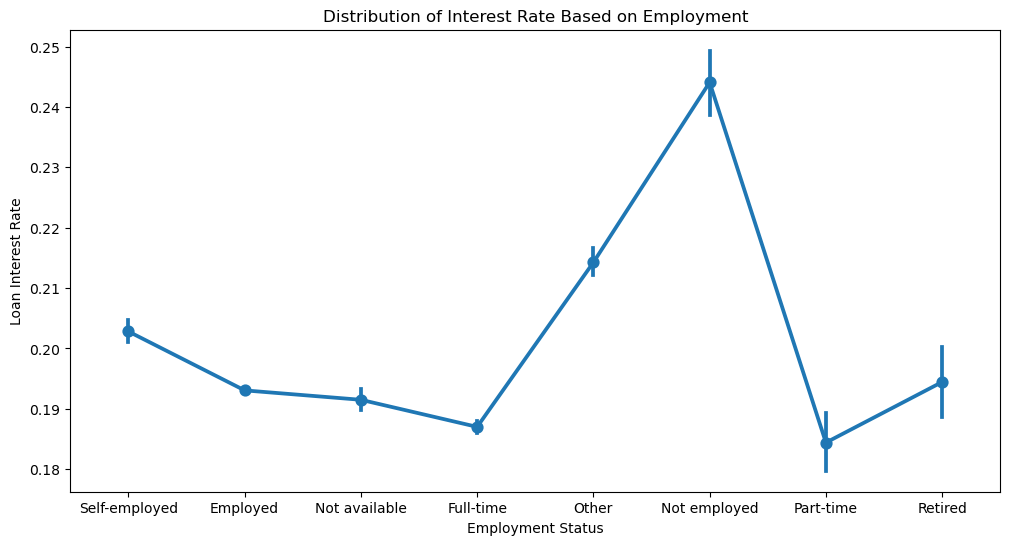

In [48]:
# plot point plot
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='EmploymentStatus', data=df)
plt.title('Distribution of Interest Rate Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Loan Interest Rate')
plt.show()

- Employed Borrowers: Tend to have lower average interest rates, indicating better creditworthiness or financial stability. 
- Unemployed or Retired Borrowers: Show higher variability in interest rates, with many falling in the higher range due to perceived lending risk.
- Self-Employed Borrowers: Often experience slightly higher rates compared to employed borrowers, likely due to income stability concerns.
- These trends suggest that employment status significantly impacts loan interest rates, with stable employment offering better loan terms.

###  Does income range influence the choice of loan term?

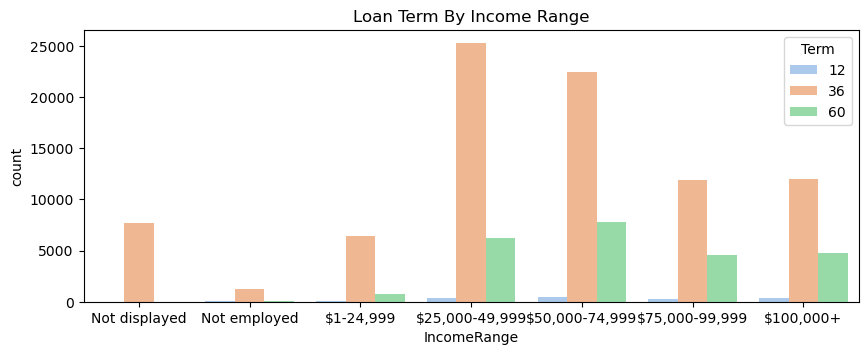

In [49]:
# plot clustered bar chart/bar plot
plt.figure(figsize = [10,12])
plt.subplot(3,1,2)
sns.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'pastel')
plt.title('Loan Term By Income Range');

- **Shorter Loan Terms (12 months)**: Borrowers in lower income ranges (e.g., `$1-24,999`) prefer shorter terms, likely to minimize overall interest.  
- **Medium Loan Terms (36 months)**: The most popular choice across all income ranges, striking a balance between affordability and repayment time.  
- **Longer Loan Terms (60 months)**: Higher-income borrowers (`$75,000+`) are more likely to choose longer terms, possibly to reduce monthly payments for larger loan amounts.  

This suggests that income significantly impacts loan term decisions, with affordability and repayment capacity being key factors.

### Do borrowers in specific occupations take loans for specific purposes

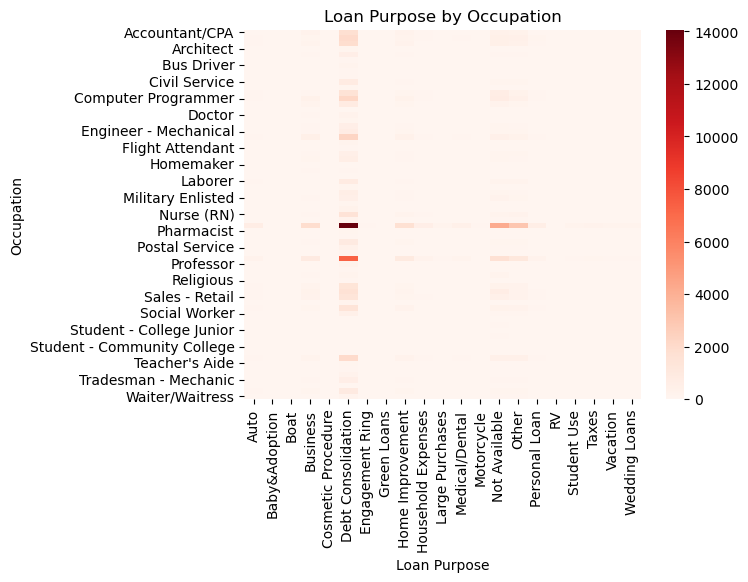

In [50]:
# plot heat map
loan_purpose_occupation = pd.crosstab(df['Occupation'], df['ListingCategory'])
sns.heatmap(loan_purpose_occupation, cmap='Reds', annot=False)
plt.title('Loan Purpose by Occupation')
plt.xlabel('Loan Purpose')
plt.ylabel('Occupation')
plt.show()

- Debt Consolidation: A dominant purpose across most occupations, especially professionals and those in business roles.
- Home Improvement: More common among occupations like engineers and management roles.
- Personal Expenses: Frequently taken by salespeople, teachers, and administrative workers.
- This analysis shows clear patterns where occupations align with particular financial needs, aiding in tailored financial services for borrowers.

### Does Borrowers with higher income ranges are likely to have lower interest rates due to reduced lending risk?

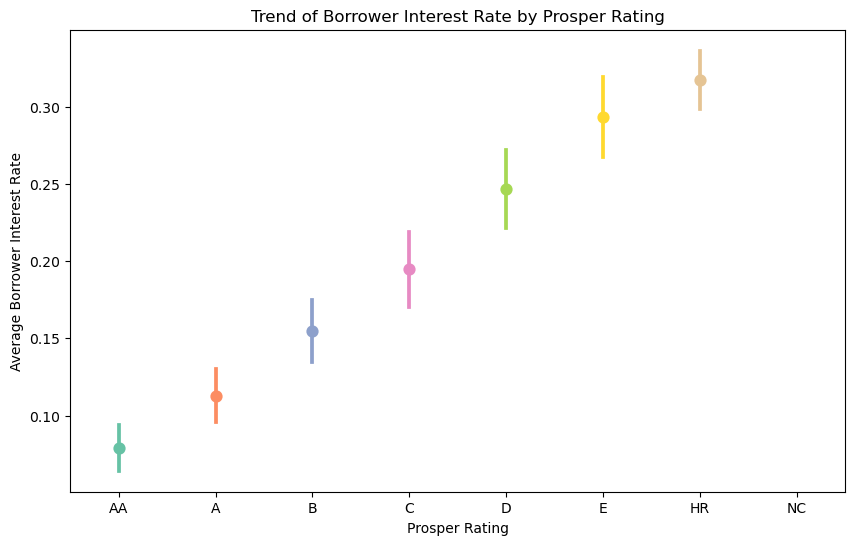

In [51]:
# plot point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='ProsperRating', y='BorrowerRate', data=df, palette='Set2', ci='sd')

# Adding titles and labels
plt.title('Trend of Borrower Interest Rate by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Average Borrower Interest Rate')
plt.show()


- **Trend**: Borrowers with **higher Prosper Ratings** (e.g., AA, A) tend to have **lower interest rates**, indicating that the Prosper rating system effectively distinguishes borrowers with lower credit risk.  
   
- **Low Prosper Ratings** (e.g., D, E, HR): Borrowers in these categories typically face **higher interest rates**. This is consistent with the idea that borrowers with lower Prosper ratings are considered higher risk, thus charged more to compensate for that risk.

- **Outliers**: Some **outliers** may exist, particularly in lower Prosper Rating categories, where there are a few loans with **interest rates much higher** than the average for the group. These could represent high-risk individuals with low creditworthiness or other financial challenges.

- **Variability**: The **variability** of interest rates increases as the Prosper Rating decreases. For example, borrowers with an "HR" rating may have a broader range of interest rates, indicating less predictability in the loan terms for higher-risk borrowers.

- **Overall Relationship**: The overall pattern shows a clear inverse relationship: **higher Prosper Ratings** are generally associated with **lower interest rates**, and **lower Prosper Ratings** are linked to **higher interest rates**.

This suggests that the Prosper Rating system helps differentiate borrowers based on their likelihood to repay the loan, with more reliable borrowers receiving better terms.

### What is the APR development over time?

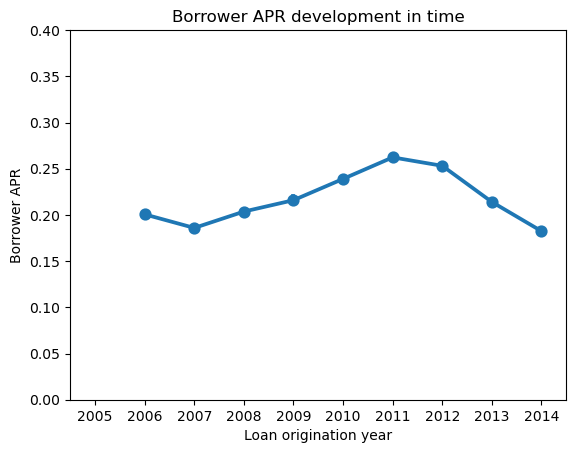

In [52]:
# plot line graph
sns.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR')
plt.title('Borrower APR development in time')
plt.ylabel('Borrower APR')
plt.xlabel('Loan origination year')
plt.ylim((0,0.4));  # Setting y-axis limits

- The Borrower APR generally shows a declining trend over the years, with some fluctuations. The data suggests that interest rates have decreased over time, likely due to changes in economic conditions or lender policies. However, there are occasional spikes or irregularities, which may indicate market disruptions or shifts in lending criteria.

### Relationship observed during analysis
- Income and Employment strongly influence loan amounts and approval likelihood, with employed borrowers and those in specific income ranges being more likely to take out larger loans.
- Debt-to-income ratio plays a crucial role in the size of the loan a borrower receives, with lower ratios correlating with higher loan amounts.
- Loan terms tend to be set at 36 months, indicating that borrowers prefer manageable repayments.
- Debt consolidation is the most common loan purpose, suggesting many borrowers are using loans to restructure or pay off existing debts.
- These relationships underscore how various factors such as income, employment, debt-to-income ratio, and loan purpose influence borrowing behavior and the lending process on Prosper.

## Conclusions
The **Prosper dataset** reveals key insights into loan origination patterns and borrower behavior. The loan amount distribution is **trimodal**, with common loan amounts at 5,000, 10,000, and 15,000, suggesting borrowers often seek loans in these ranges. Borrowers with **higher stated monthly incomes** tend to have loan spikes around specific income values like 4,000, 4,500, and 5,000 after outliers are filtered. **Employed individuals** are more likely to take out loans, and the majority prefer a **36-month loan term**. Over **60% of borrowers are homeowners**, indicating a relationship between homeownership and loan acquisition.

A significant proportion of loans are issued to borrowers with a **low debt-to-income ratio**, particularly for larger loan amounts. Most loans are used for **debt consolidation**, reflecting a common trend of borrowers using loans to pay off existing debt. Additionally, the **year 2013** stands out as the peak year for loan originations, and **current loans** dominate the dataset, suggesting many loans remain active.

In summary, Prosper’s dataset highlights trends in borrower behavior, loan preferences, and financial health, offering insights into how borrowers use loans primarily for debt management and how loan terms, income, and employment status influence lending patterns.
